# Digit Recognition

## Importing data

In [36]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt


digits = datasets.load_digits()

## Preparing data

In [37]:
images = digits.images
labels = digits.target

n_samples = len(images)
images = images.reshape((n_samples, -1))

classes = ['0','1','2','3','4','5','6','7','8','9']


n_train = int(n_samples*0.8) #We train the model with 80% of samples in the DataSet 
n_test = n_samples - n_train #and we validate the model with the 20% of he samples

## Splitting Data into Train and Test


In [38]:
X_train = images[:n_train]
X_test = images[n_train:]

Y_train = labels[:n_train]
Y_test = labels[n_train:]

## Creating and training the model
#### Decision Tree model

In [39]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree_model = DecisionTreeClassifier(max_depth=2,random_state=0)
DecisionTree_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## Printing the model

[Text(446.4, 498.3, 'X[36] <= 0.5\ngini = 0.9\nsamples = 1437\nvalue = [143, 146, 142, 146, 144, 145, 144, 143, 141, 143]\nclass = 1'),
 Text(223.2, 298.98, 'X[42] <= 3.5\ngini = 0.54\nsamples = 217\nvalue = [140, 0, 2, 1, 6, 22, 5, 0, 2, 39]\nclass = 0'),
 Text(111.6, 99.65999999999997, 'gini = 0.447\nsamples = 56\nvalue = [0, 0, 0, 1, 0, 17, 0, 0, 0, 38]\nclass = 9'),
 Text(334.79999999999995, 99.65999999999997, 'gini = 0.24\nsamples = 161\nvalue = [140, 0, 2, 0, 6, 5, 5, 0, 2, 1]\nclass = 0'),
 Text(669.5999999999999, 298.98, 'X[60] <= 2.5\ngini = 0.888\nsamples = 1220\nvalue = [3, 146, 140, 145, 138, 123, 139, 143, 139, 104]\nclass = 1'),
 Text(558.0, 99.65999999999997, 'gini = 0.347\nsamples = 128\nvalue = [0, 0, 0, 1, 5, 16, 0, 102, 0, 4]\nclass = 7'),
 Text(781.1999999999999, 99.65999999999997, 'gini = 0.882\nsamples = 1092\nvalue = [3, 146, 140, 144, 133, 107, 139, 41, 139, 100]\nclass = 1')]

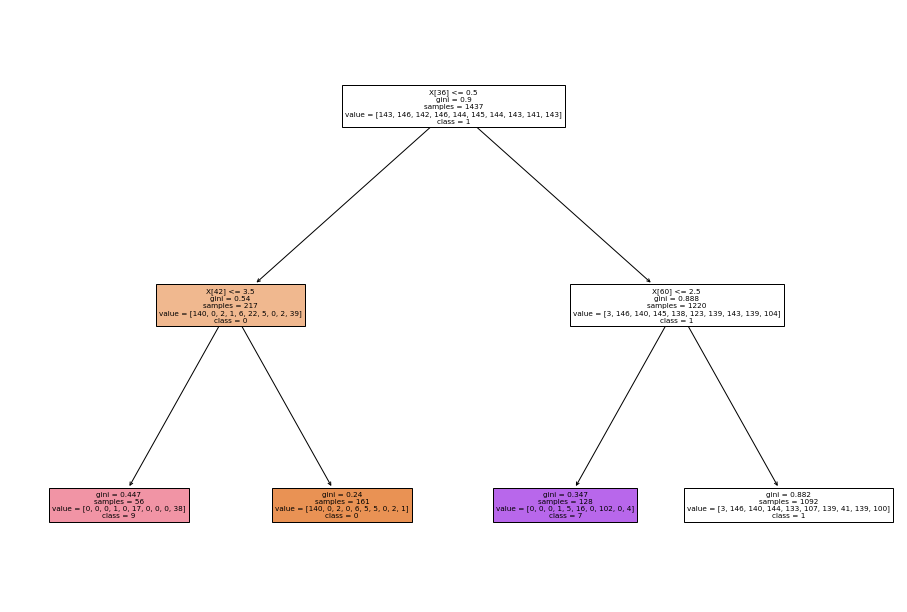

In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(16,11))
plot_tree(DecisionTree_model,class_names = classes,filled= True)

In [41]:
print(export_text(DecisionTree_model,show_weights=True))

|--- feature_36 <= 0.50
|   |--- feature_42 <= 3.50
|   |   |--- weights: [0.00, 0.00, 0.00, 1.00, 0.00, 17.00, 0.00, 0.00, 0.00, 38.00] class: 9
|   |--- feature_42 >  3.50
|   |   |--- weights: [140.00, 0.00, 2.00, 0.00, 6.00, 5.00, 5.00, 0.00, 2.00, 1.00] class: 0
|--- feature_36 >  0.50
|   |--- feature_60 <= 2.50
|   |   |--- weights: [0.00, 0.00, 0.00, 1.00, 5.00, 16.00, 0.00, 102.00, 0.00, 4.00] class: 7
|   |--- feature_60 >  2.50
|   |   |--- weights: [3.00, 146.00, 140.00, 144.00, 133.00, 107.00, 139.00, 41.00, 139.00, 100.00] class: 1



In [42]:
Y_predicted=DecisionTree_model.predict(X_test)

print("The accuracy of the Decision tree algorithm is")
DecisionTree_model.score(X_test,Y_test)


The accuracy of the Decision tree algorithm is


0.30833333333333335

In [43]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
print(classification_report(Y_test, Y_predicted ))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        35
           1       0.14      1.00      0.24        36
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        37
           5       0.00      0.00      0.00        37
           6       0.00      0.00      0.00        37
           7       0.59      0.67      0.62        36
           8       0.00      0.00      0.00        33
           9       0.89      0.46      0.61        37

    accuracy                           0.31       360
   macro avg       0.25      0.31      0.24       360
weighted avg       0.25      0.31      0.24       360



C:\Users\Mvox\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


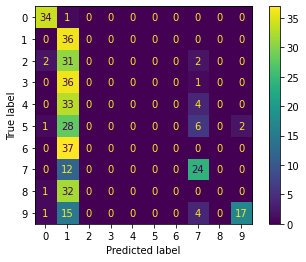

In [44]:
confusion_matrix = confusion_matrix(Y_test, Y_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

disp.plot()
